In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/House_price.csv')
df.shape

(1459, 80)

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [4]:
df.shape[0]

1459

In [5]:
df.isnull().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [6]:
drop_column=[var for var in df.columns if df[var].isnull().sum()/df.shape[0]*100>20]
drop_column

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
df=df.drop(columns=drop_column)
df.shape

(1459, 75)

In [8]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [10]:
df_num.keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:
df_num.isnull().sum()/df_num.shape[0]*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      15.558602
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        1.028101
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
TotalBsmtSF       0.068540
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.137080
BsmtHalfBath      0.137080
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.346127
GarageCars        0.068540
GarageArea        0.068540
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
d

In [13]:
[var for var in df_num.columns if df_num[var].isnull().sum()/df_num.shape[0]*100>1]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [15]:
df_cat.keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
df_cat.isnull().sum()/df_cat.shape[0]*100

MSZoning         0.274160
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.137080
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000000
KitchenQual      0.068540
Functional       0.137080
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
PavedDrive       0.000000
SaleType         0.068540
SaleCondition    0.000000
dtype: float

In [19]:
num_vars=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars=['LotConfig','MasVnrType','GarageType']
tuple(zip(cat_vars,num_vars))

(('LotConfig', 'LotFrontage'),
 ('MasVnrType', 'MasVnrArea'),
 ('GarageType', 'GarageYrBlt'))

In [22]:
df['LotConfig'].unique()

array(['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [27]:
df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean())

0        80.000000
2        74.000000
3        78.000000
4        43.000000
6        66.709746
           ...    
1454     21.000000
1455     21.000000
1456    160.000000
1457     62.000000
1458     74.000000
Name: LotFrontage, Length: 1081, dtype: float64

In [32]:
df_copy=df.copy()
for cat_var,num_var in zip(cat_vars,num_vars):
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:,cat_var]==var_class][num_var].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var].mean()))

In [33]:
df_copy[num_vars].isnull().sum()

LotFrontage     0
MasVnrArea     15
GarageYrBlt    76
dtype: int64

In [35]:
num_vars=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars=['LotConfig','RoofStyle','Electrical']
tuple(zip(cat_vars,num_vars))

(('LotConfig', 'LotFrontage'),
 ('RoofStyle', 'MasVnrArea'),
 ('Electrical', 'GarageYrBlt'))

In [36]:
df_copy=df.copy()
for cat_var,num_var in zip(cat_vars,num_vars):
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:,cat_var]==var_class][num_var].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var].mean()))

In [37]:
df_copy[num_vars].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
df_copy_median=df.copy()
for cat_var,num_var in zip(cat_vars,num_vars):
  for var_class in df[cat_var].unique():
    df_copy_median.update(df[df.loc[:,cat_var]==var_class][num_var].replace(np.nan,df[df.loc[:,cat_var]==var_class][num_var].median()))

In [39]:
df_copy_median[num_vars].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [40]:
list(enumerate(num_vars,start=1))

[(1, 'LotFrontage'), (2, 'MasVnrArea'), (3, 'GarageYrBlt')]

<ipython-input-43-95d5caa68640>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item],bins=20,label='Original')
<ipython-input-43-95d5caa68640>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[item],bins=20,label='Mean')
<ipython-input-43-95d5caa68640>:5: UserWarning: 

`distplot` is

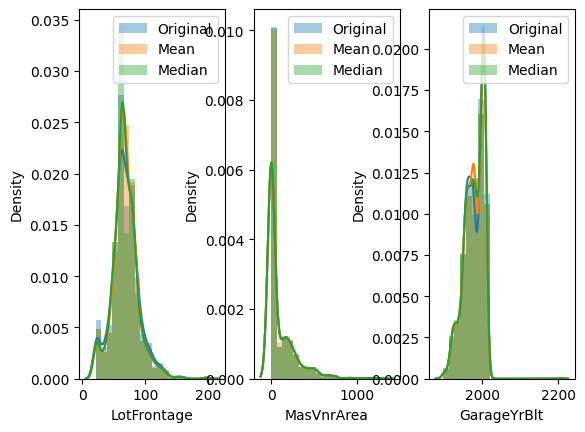

In [43]:
for index,item in enumerate(num_vars,start=1):
  plt.subplot(1,3,index)
  sns.distplot(df[item],bins=20,label='Original')
  sns.distplot(df_copy[item],bins=20,label='Mean')
  sns.distplot(df_copy_median[item],bins=20,label='Median')
  plt.legend()